In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
titanic=pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic.shape

(418, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

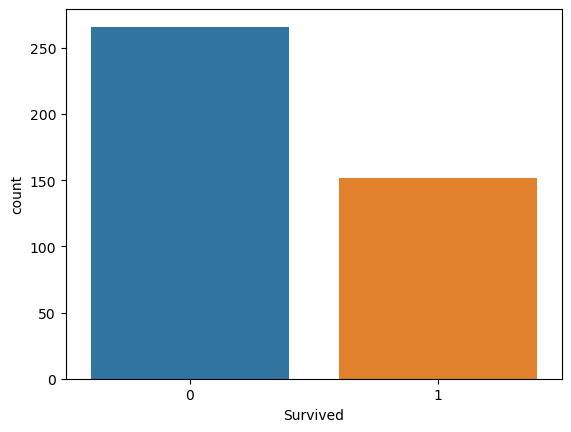

In [8]:
sns.countplot(x='Survived', data=titanic)

In [9]:
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

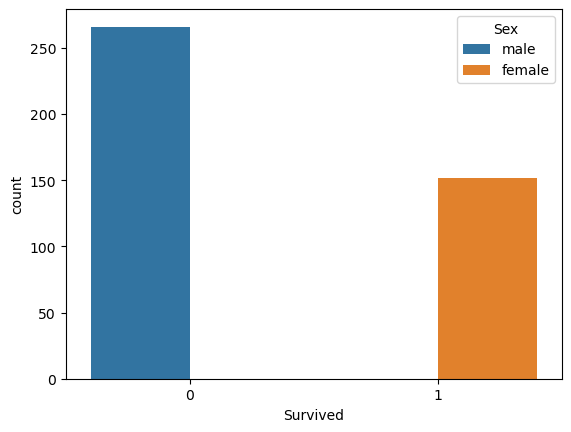

In [10]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

,Sex,Survived
0,female,1.0
1,male,0.0


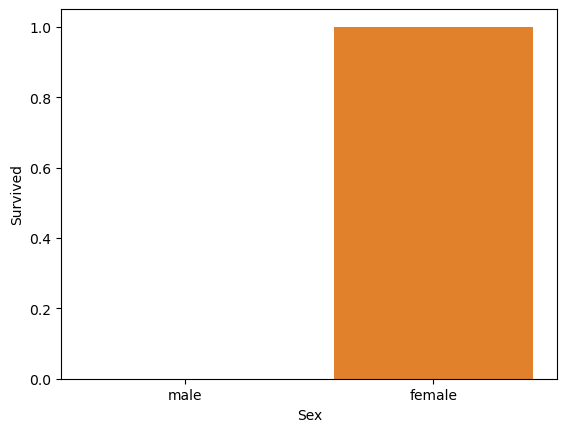

In [11]:
sns.barplot(x='Sex',y='Survived',data=titanic)
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [12]:
titanic['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

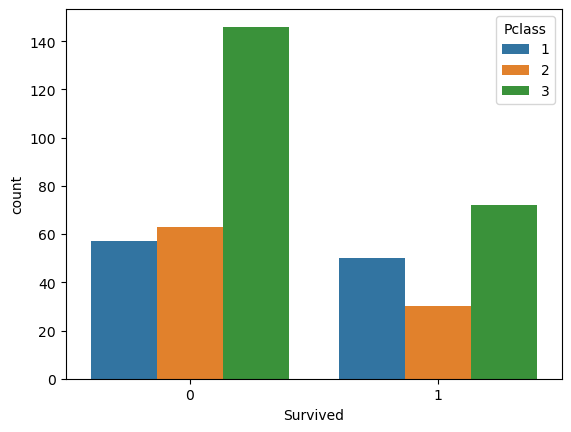

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


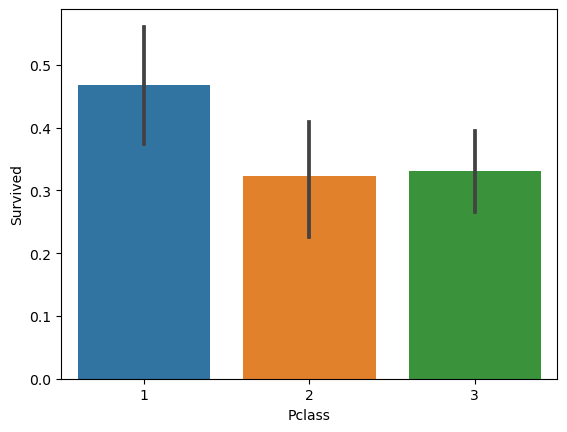

In [14]:
sns.barplot(x='Pclass',y='Survived',data=titanic)
titanic[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [15]:
titanic['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

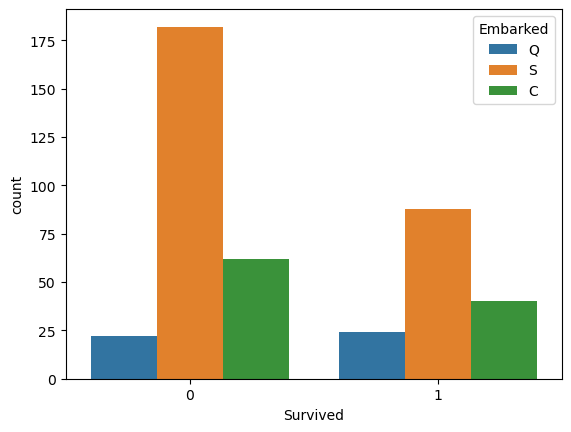

In [16]:
sns.countplot(x='Survived', hue='Embarked', data=titanic)

,Embarked,Survived
1,Q,0.521739
0,C,0.392157
2,S,0.325926


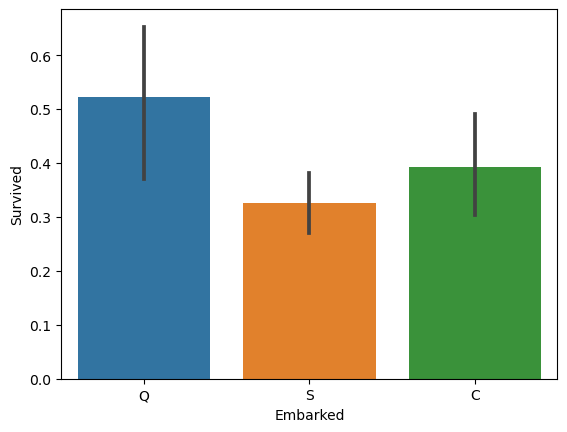

In [17]:
sns.barplot(x='Embarked',y='Survived',data=titanic)
titanic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [18]:
titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1, 'Q': 2}})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: ylabel='Frequency'>

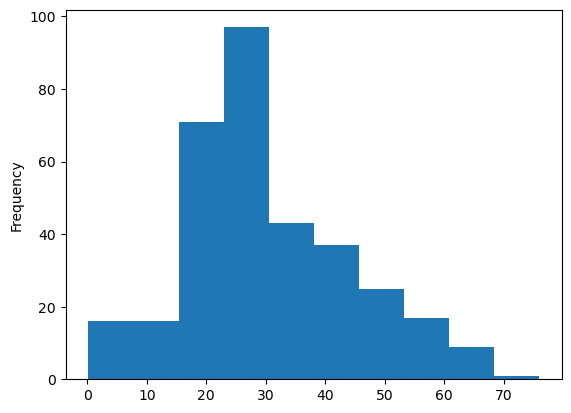

In [19]:
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

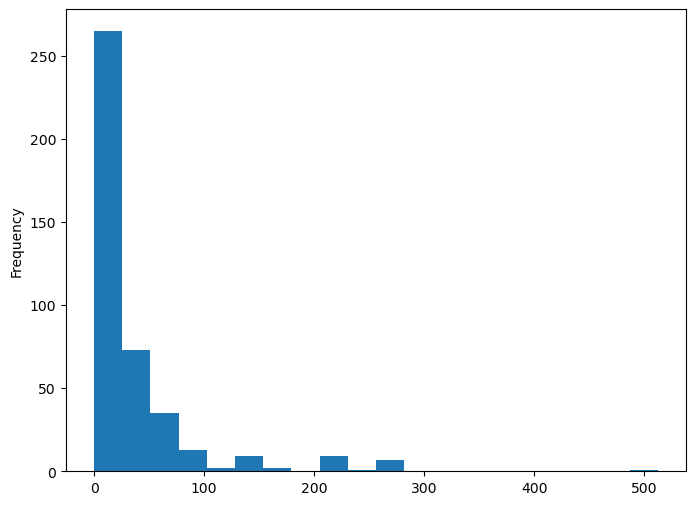

In [20]:
titanic['Fare'].plot.hist(bins=20, figsize=(8,6))

In [21]:
titanic['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

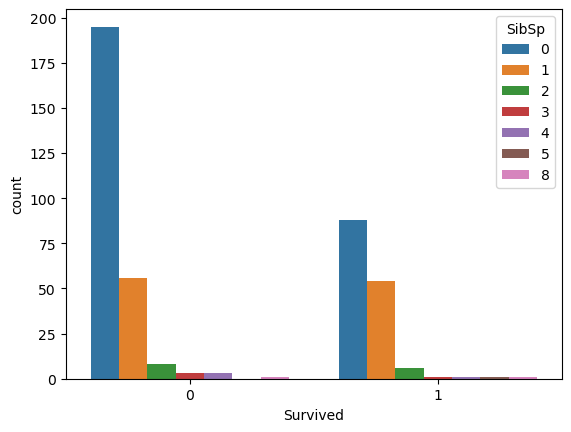

In [22]:
sns.countplot(x='Survived', hue='SibSp', data=titanic)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


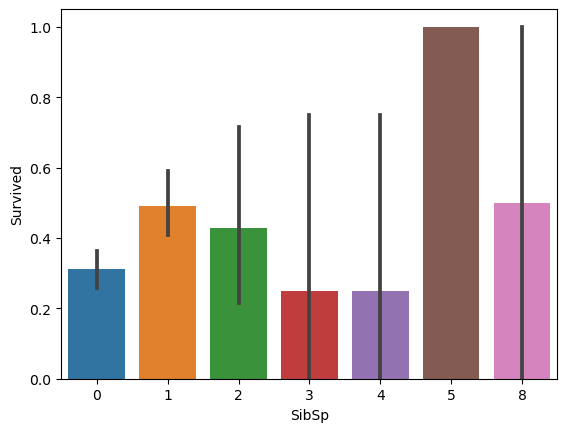

In [23]:
sns.barplot(x='SibSp',y='Survived',data=titanic)
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [24]:
titanic['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

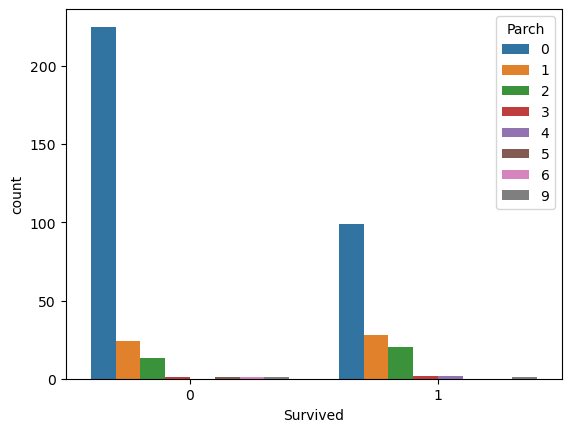

In [25]:
sns.countplot(x='Survived', hue='Parch', data=titanic)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


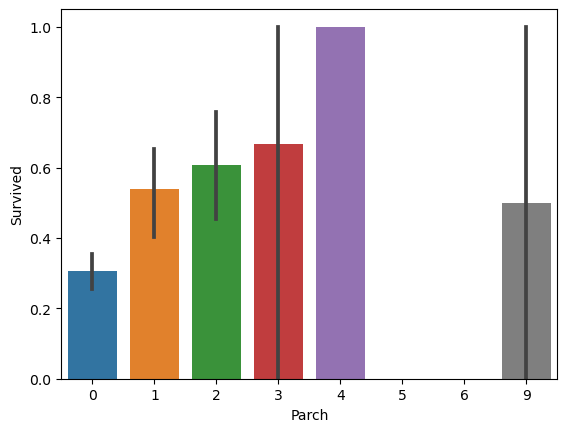

In [26]:
sns.barplot(x='Parch',y='Survived',data=titanic)
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

<Axes: xlabel='Age', ylabel='Survived'>

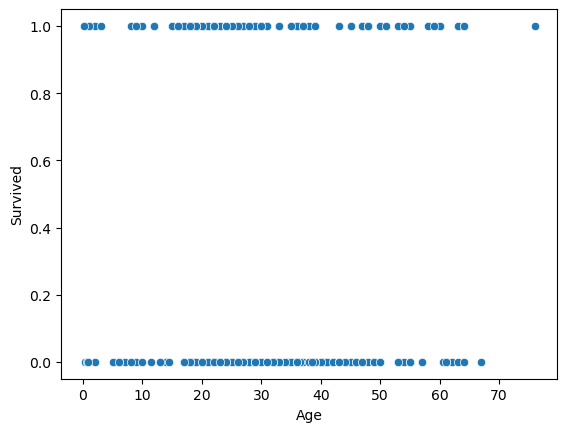

In [27]:
sns.scatterplot(x='Age',y='Survived',data=titanic)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


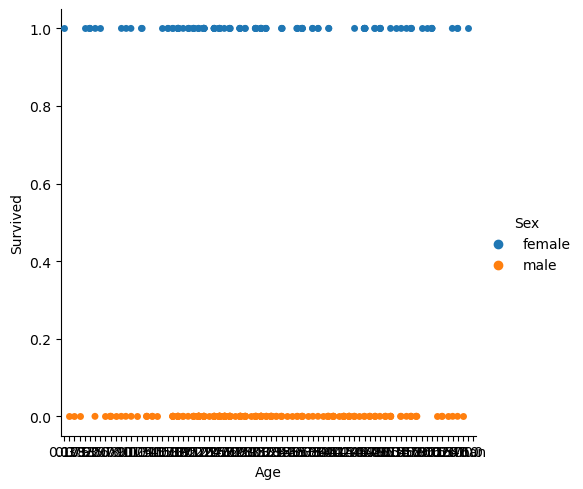

In [28]:
sns.catplot(x='Age',y='Survived',data=titanic,hue='Sex')

In [29]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

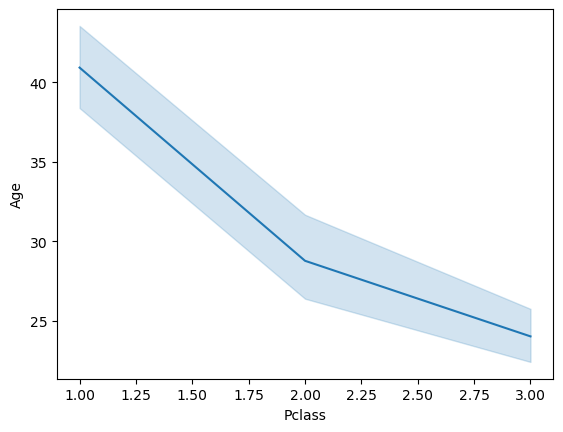

In [30]:
sns.lineplot(x='Pclass',y='Age', data=titanic)

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Separating features and target

In [32]:
X=titanic.drop(columns = ['Survived', 'Age','Parch', 'Fare'], axis=1)
Y= titanic['Survived']
print(X)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex  SibSp              Ticket Cabin Embarked  
0      male      0              330911   NaN        Q  

In [33]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [34]:
titanic.drop('Cabin', axis=1, inplace=True)

In [35]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [36]:
titanic.dropna(inplace=True)

<Axes: >

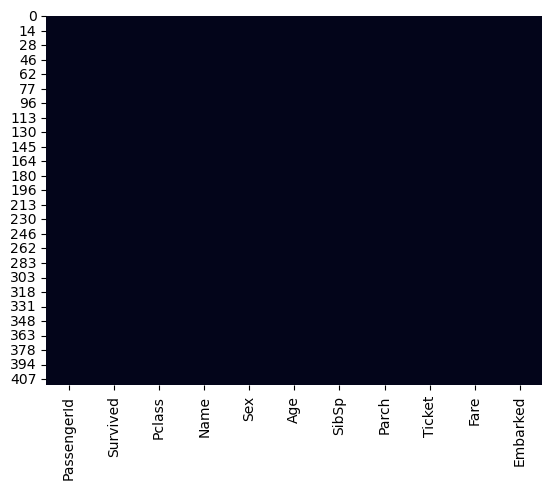

In [37]:
sns.heatmap(titanic.isnull(), cbar=False)

In [38]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [40]:
pd.get_dummies(titanic['Sex']).head(5)

,female,male
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False


In [41]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head(3)

,male
0,True
1,False
2,True


In [42]:
embarked=pd.get_dummies(titanic['Embarked'])
embarked.head(3)

,C,Q,S
0,False,True,False
1,False,False,True
2,False,True,False


In [43]:
embarked=pd.get_dummies(titanic['Embarked'], drop_first=True)
embarked.head(3)

,Q,S
0,True,False
1,False,True
2,True,False


In [44]:
Pcl=pd.get_dummies(titanic['Pclass'], drop_first=True)
Pcl.head(3)

,2,3
0,False,True
1,False,True
2,True,False


In [45]:
titanic=pd.concat([titanic, sex, embarked, Pcl], axis=1)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,True,True,False,False,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False,False,True,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,True,True,False,True,False


In [46]:
titanic.drop(['Name','PassengerId', 'Pclass', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,True,True,False,False,True
1,1,47.0,1,0,7.0000,False,False,True,False,True
2,0,62.0,0,0,9.6875,True,True,False,True,False


In [47]:
X=titanic.drop('Survived', axis=1)
y=titanic['Survived']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.66, random_state=7)
print(X.shape, X_train.shape, X_test.shape)

(331, 9) (112, 9) (219, 9)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [51]:
X_train = pd.DataFrame(X_train) 
X_train.columns = X_train.columns.astype(str)  
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Accuracy

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
X_train.columns = X_train.columns.astype(str)
lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
X_test.columns = X_test.columns.astype(str)
predict=lr.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,72,0
Actual Yes,0,38


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        38

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

